In [8]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.Collecting seaborn
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/8b/ce/15b0bb2fb29b3d46211d8ca740b96b5232499fc49200b58b8d571292c9a6/matplotlib-3.9.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8d/2f/804f02ff30a7fae21f98198828d0857439ec4c91a96e20cf2d6c49372966/contourpy-1.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from http

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


AttributeError: module 'matplotlib' has no attribute 'show'

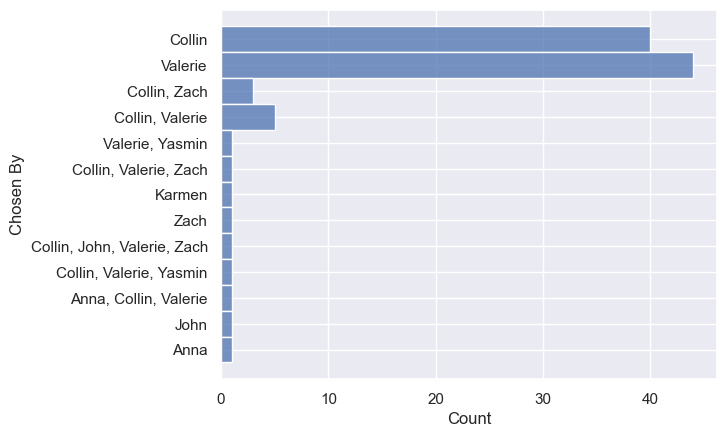

In [40]:
import pandas as pd
import numpy as np
import matplotlib as plt
from datetime import datetime
import seaborn as sns
import re


# import file
movie_list = pd.read_csv('movie_list.csv')

# drop nulls
movie_list_real = movie_list.dropna()


# filter for person 1 picks
collin_picks = movie_list_real[movie_list_real["Chosen By"]=='Collin']


# count of person 1 picks
count_of_collin_picks = collin_picks.count()


# person 1's highest rating
collin_picks = movie_list_real["Collin Rating"]
c_num_1= max(collin_picks)


#person #1's lowest rating
c_worst = min(collin_picks)

#person #1's avg rating, rounded 2 decimals
c_avg= collin_picks.mean().round(2)
c_avg



#person #1's most watched decade TODO

# extracted column as a list 
# release_string = str(movie_list_real["Release Date"].iloc[0])

# # String to timedate
# time_object = datetime.strptime(release_string, '%B %d, %Y')

# # Example with a standard date string
# date_str = 'March 22, 2019'
# date_format = '%B %d, %Y'

# date_obj = datetime.strptime(date_str, date_format)
# date_obj

# year=time_object.year
# year

# movie_list_real["year"] = year

# # create decade floor
# decade_floor = np.floor(movie_list_real["year"] / 10).astype(int)
# movie_list_real["decades"] = decade_floor * 10

# mean_watched_decade = movie_list_real.groupby("decades")["year"].mean()
# max_decade = mean_watched_decade.idxmax()  # Corrected to find the index (decade) of the max value


# # Count Plot of Movie Sources 
# m= movie_list_real["Source"].value_counts()
# m
# # movie_list_real
# g= sns.countplot(data=movie_list_real, x = "Source", hue = "Source")
# g.set_xticklabels(labels = Source, rotation=45) 



# # Histogram of picks per person
sns.set_theme(style="darkgrid")
sns.histplot(data = movie_list_real, y= movie_list_real["Chosen By"])
plt.show()


# # Box Plot of ratings
# sns.boxplot( x = movie_list_real, y= movie_list_real["Chosen By"]=='Collin')
